In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext nb_black

<IPython.core.display.Javascript object>

#### Originally from book:
#### Python Machine Learning ISBN:9781119545637

#### Use Boston Housing Dataset

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

In [3]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<IPython.core.display.Javascript object>

In [4]:
dataset.data.shape

(506, 13)

<IPython.core.display.Javascript object>

In [5]:
dataset.target.shape

(506,)

<IPython.core.display.Javascript object>

In [6]:
df_housing = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

<IPython.core.display.Javascript object>

In [7]:
df_housing["MEDV"] = dataset.target

<IPython.core.display.Javascript object>

In [8]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<IPython.core.display.Javascript object>

In [9]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<IPython.core.display.Javascript object>

In [10]:
df_housing.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

<IPython.core.display.Javascript object>

#### Correlation

Text(0.5, 1.05, 'Correlation Matrix')

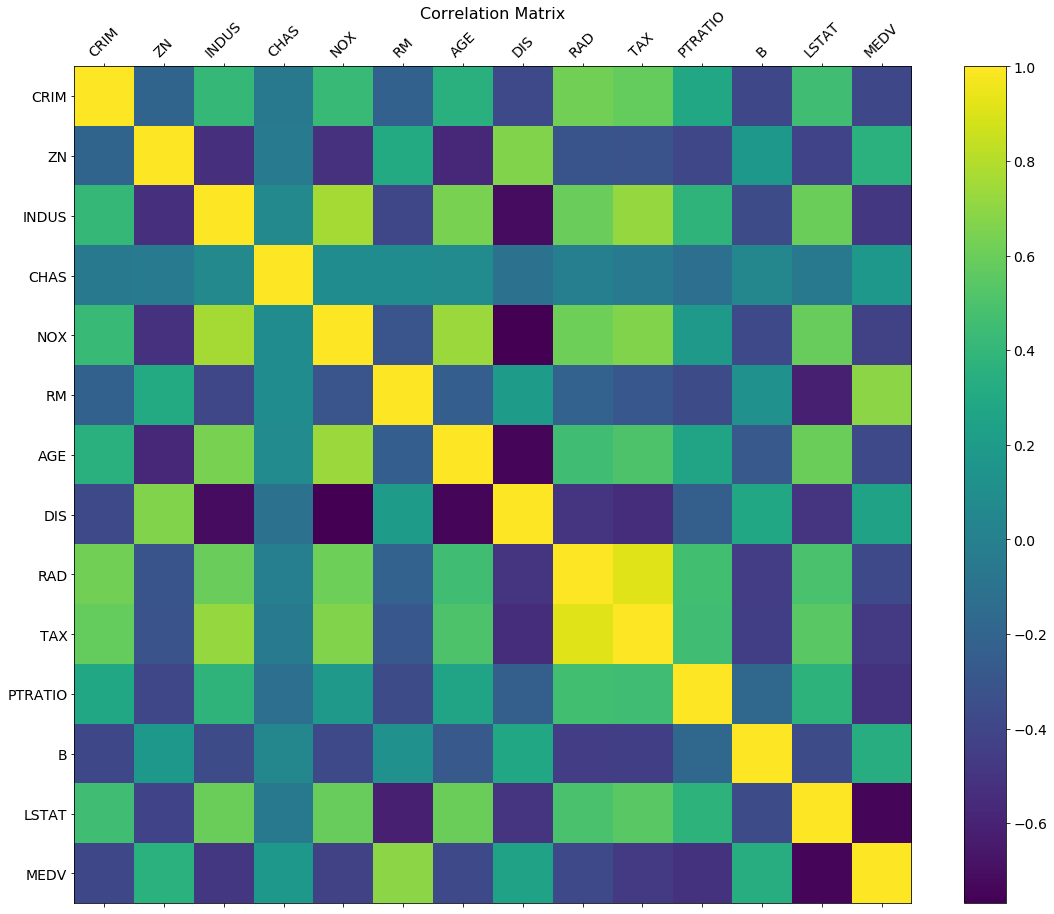

<IPython.core.display.Javascript object>

In [11]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_housing.corr(), fignum=f.number)
plt.xticks(range(df_housing.shape[1]), df_housing.columns, fontsize=14, rotation=45)
plt.yticks(range(df_housing.shape[1]), df_housing.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix", fontsize=16)

In [12]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<IPython.core.display.Javascript object>

In [13]:
df_housing.corr()["MEDV"].abs().nlargest(3)

MEDV     1.000000
LSTAT    0.737663
RM       0.695360
Name: MEDV, dtype: float64

<IPython.core.display.Javascript object>

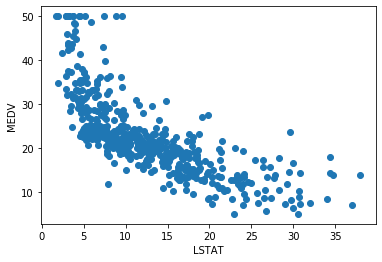

<IPython.core.display.Javascript object>

In [14]:
plt.scatter(df_housing["LSTAT"], df_housing["MEDV"])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

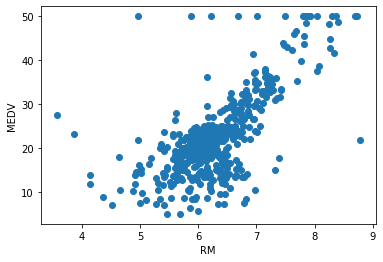

<IPython.core.display.Javascript object>

In [15]:
plt.scatter(df_housing["RM"], df_housing["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

In [16]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>

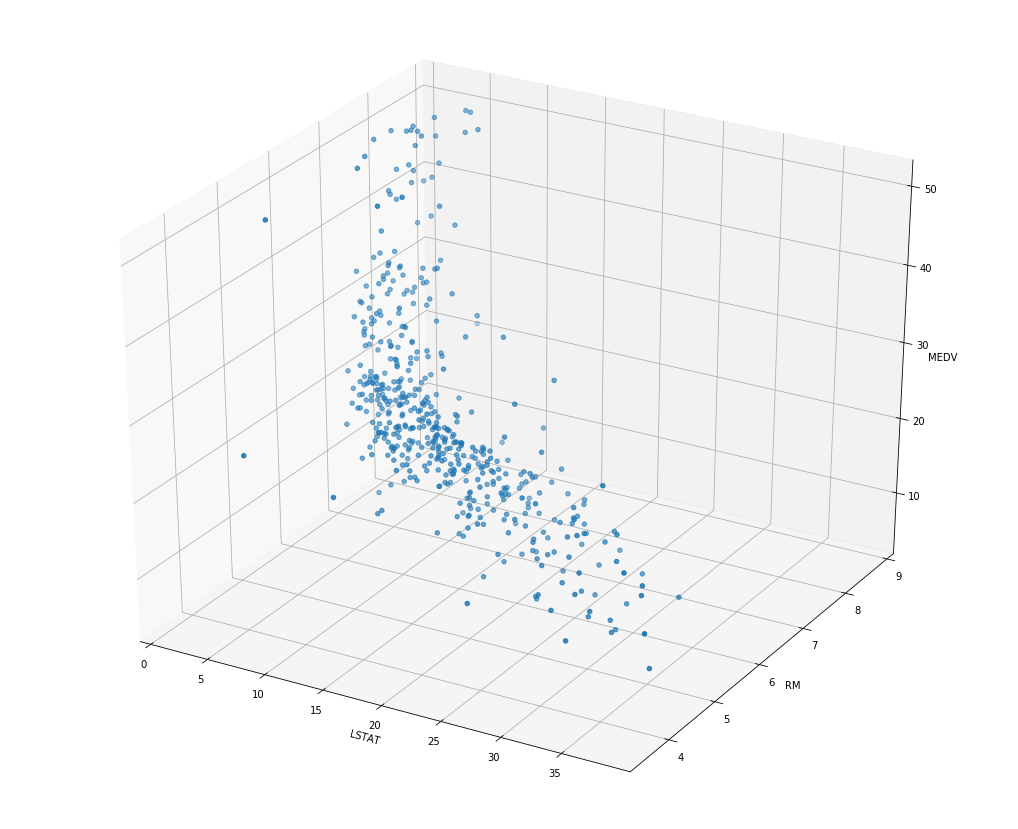

<IPython.core.display.Javascript object>

In [17]:
fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df_housing["LSTAT"], df_housing["RM"], df_housing["MEDV"])

ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

plt.show()

### Train the model on two most important features:
### "RM" and "LSTAT"

#### Prepare Data

In [18]:
X = df_housing[["LSTAT", "RM"]].values
Y = df_housing["MEDV"].values

<IPython.core.display.Javascript object>

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

<IPython.core.display.Javascript object>

In [20]:
x_train.shape, Y_train.shape

((354, 2), (354,))

<IPython.core.display.Javascript object>

In [21]:
x_test.shape, Y_test.shape

((152, 2), (152,))

<IPython.core.display.Javascript object>

### Model

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

In [23]:
Y_pred = model.predict(x_test)

<IPython.core.display.Javascript object>

In [24]:
print("R-squared score: %.3f" % model.score(x_test, Y_test))

R-squared score: 0.616


<IPython.core.display.Javascript object>

#### Prediction Analysis

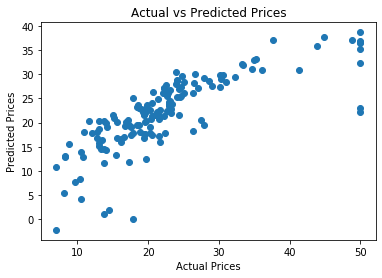

<IPython.core.display.Javascript object>

In [25]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.title("Actual vs Predicted Prices")
plt.show()

In [26]:
model.coef_, model.intercept_

(array([-0.65957972,  4.83197581]), 0.38437936780346504)

<IPython.core.display.Javascript object>

## Polynomial model

In [27]:
from sklearn.preprocessing import PolynomialFeatures

<IPython.core.display.Javascript object>

In [28]:
polynomial_features = PolynomialFeatures(degree=2)

<IPython.core.display.Javascript object>

In [29]:
x_train_poly = polynomial_features.fit_transform(x_train)

<IPython.core.display.Javascript object>

In [30]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

In [31]:
x_test_poly = polynomial_features.fit_transform(x_test)

<IPython.core.display.Javascript object>

In [32]:
print("R-squared score: %.3f" % poly_model.score(x_test_poly, Y_test))

R-squared score: 0.734


<IPython.core.display.Javascript object>

In [33]:
poly_model.intercept_, poly_model.coef_

(26.933430523839295,
 array([ 0.00000000e+00,  1.47424550e+00, -6.70204730e+00,  7.93570743e-04,
        -3.66578385e-01,  1.17188007e+00]))

<IPython.core.display.Javascript object>